In [2]:
#Install SQL context for iPython

In [3]:
%%!
pip install --trusted-host pypi.org ipython-sql

['Requirement already satisfied: ipython-sql in /srv/conda/lib/python3.6/site-packages (0.3.9)',
 'Requirement already satisfied: ipython-genutils>=0.1.0 in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (0.2.0)',
 'Requirement already satisfied: prettytable in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (0.7.2)',
 'Requirement already satisfied: six in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (1.12.0)',
 'Requirement already satisfied: ipython>=1.0 in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (7.2.0)',
 'Requirement already satisfied: sqlalchemy>=0.6.7 in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (1.2.15)',
 'Requirement already satisfied: sqlparse in /srv/conda/lib/python3.6/site-packages (from ipython-sql) (0.2.4)',
 'Requirement already satisfied: setuptools>=18.5 in /srv/conda/lib/python3.6/site-packages (from ipython>=1.0->ipython-sql) (40.6.3)',
 'Requirement already satisfied: jedi>=0.10 in /srv/conda/lib

In [5]:
#Install Pandas for Python

In [28]:
%%!
pip install pandas xlrd matplotlib seaborn

['Requirement already satisfied: pandas in /srv/conda/lib/python3.6/site-packages (0.24.0)',
 'Requirement already satisfied: xlrd in /srv/conda/lib/python3.6/site-packages (1.2.0)',
 'Requirement already satisfied: matplotlib in /srv/conda/lib/python3.6/site-packages (3.0.2)',
 'Collecting seaborn',
 '  Downloading https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl (208kB)',
 'Requirement already satisfied: numpy>=1.12.0 in /srv/conda/lib/python3.6/site-packages (from pandas) (1.16.0)',
 'Requirement already satisfied: pytz>=2011k in /srv/conda/lib/python3.6/site-packages (from pandas) (2018.9)',
 'Requirement already satisfied: python-dateutil>=2.5.0 in /srv/conda/lib/python3.6/site-packages (from pandas) (2.7.5)',
 'Requirement already satisfied: kiwisolver>=1.0.1 in /srv/conda/lib/python3.6/site-packages (from matplotlib) (1.0.1)',
 'Requirement already satisfied: cycler>=0.10 in /srv/conda/lib/p

In [6]:
# Load SQL context for iPython
%load_ext sql

In [7]:
# Create an SQLite DB connection for this session
%sql sqlite://

'Connected: @None'

In [9]:
# Lets try creating a table called "CARTOON" with two character columns by first defining a schema and then inserting two rows
%%sql
DROP TABLE IF EXISTS CARTOON;
CREATE TABLE CARTOON ( firstname varchar(50), lastname varchar(50));
INSERT INTO CARTOON VALUES('daffy', 'duck');
INSERT INTO CARTOON VALUES('mickey', 'mouse');
SELECT * from CARTOON;

 * sqlite://
Done.
Done.
1 rows affected.
1 rows affected.
Done.


firstname,lastname
daffy,duck
mickey,mouse


In [12]:
# Lets load an Excel sheet with two numeric columns representing male and female body temperatures into Python, as a Pandas Data Frame 
import pandas as pd
BodyTempsData = pd.read_excel('BodyTempsData.xlsx')
BodyTempsData.columns = ['Female', 'Male']

BodyTempsData.head()

,Female,Male
0,96.4,97.0
1,96.7,97.0
2,96.8,97.0
3,97.2,97.0
4,97.2,97.1


In [19]:
#Load the Pandas Data Frame into an SQL Table in SQLite, but first remove any table with the same name if it exists!
%sql DROP TABLE IF EXISTS BodyTempsData;

 * sqlite://
Done.


[]

In [20]:
%sql PERSIST BodyTempsData;

 * sqlite://


'Persisted bodytempsdata'

In [21]:
# Lets analyze the data starting with a count of the number of records in the dataset 
%sql select count(*) from BodyTempsData; 

 * sqlite://
Done.


count(*)
65


In [24]:
# Lets analyze the data starting with a count of the number of records in the dataset for a specific condition based on a temperature threshold for febrile patients
%sql select count(*) from BodyTempsData where Female > 98.4 and Male > 98.4

 * sqlite://
Done.


count(*)
22


In [29]:
# Lets make some plots to visualize the distributions of temperatures of females v/s male patients
# A Boxplot may be a good choice for this and can be implemented in a number of ways, including through matplotlib, as shown below:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(10,  10))
#BodyTempsData.boxplot(['Female','Male'])

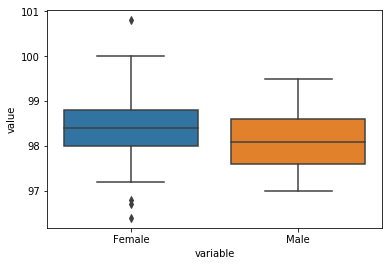

In [31]:
#... or through Seaborn - for a much nicer-looking graph! 
import seaborn as sns
sns.boxplot(x="variable", y="value", data=pd.melt(BodyTempsData))

In [32]:
# Melt the dataset into a new form that has two columns, 'variable' (viz. the original column name) and 'value'
BodyTempsDataMelt=pd.melt(BodyTempsData)
BodyTempsDataMelt.head()

,variable,value
0,Female,96.4
1,Female,96.7
2,Female,96.8
3,Female,97.2
4,Female,97.2


In [33]:
# Make this melted Pandas data frame into a table on SQLite, but drop any table with the same name first!
%sql DROP TABLE IF EXISTS BodyTempsDataMelt

 * sqlite://
Done.


[]

In [34]:
%sql PERSIST BodyTempsDataMelt

 * sqlite://


'Persisted bodytempsdatamelt'

In [35]:
# Leverage 'grouping' to get summary statistics defining the count, min and max temperatures for females v/s males
%sql SELECT variable as Gender, COUNT(*) as NumberOfObservations , MIN(value) as MinTemp, MAX(value) as MaxTemp FROM BodyTempsDataMelt GROUP BY variable ORDER BY value DESC   --ASC

 * sqlite://
Done.


Gender,NumberOfObservations,MinTemp,MaxTemp
Female,65,96.4,100.8
Male,65,97.0,99.5
